In [ ]:
# Cosmic Web Analysis: Spectroscopic vs Photometric Comparison
# Team:Jenna Shuffelton, Valeria Lopez, Celine Mayer
# Question: Does the spectroscopic sample miss cosmic structures due to selection bias?
# We want: Compare SDSS spectroscopic and photometric galaxy samples to investigate
# whether selection bias causes us to miss large-scale structures (filaments, voids, clusters)

In [ ]:
## Our Sky Region (values in the proposal!)

#RA:180 to 185 (5 degree width) -- degrees
#Dec: 30 to 35 (5 degree height) -- degrees
#Redshift 0.02 < z < 0.30

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install astro-datalab
from dl import queryClient as qc
from astropy.cosmology import Planck18 as cosmo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.4/966.4 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.0/98.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.3/350.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 2.6 MB/s eta 0:00:00


In [4]:
#region parameters
ra_min = 180.0
ra_max = 185.0
dec_min = 30.0
dec_max = 35.0
z_min = 0.02
z_max = 0.30

print(f"RA range:  {ra_min} to {ra_max} degrees (width: {ra_max - ra_min} degrees)")
print(f"Dec range: {dec_min} to {dec_max} degrees (height: {dec_max - dec_min} degrees)")
print(f"Redshift:  {z_min} to {z_max}\n")
print(f"Sky area: {(ra_max - ra_min) * (dec_max - dec_min)} square degrees")

RA range:  180.0 to 185.0 degrees (width: 5.0 degrees)
Dec range: 30.0 to 35.0 degrees (height: 5.0 degrees)
Redshift:  0.02 to 0.3

Sky area: 25.0 square degrees


In [ ]:
#Spectroscopic Data Collection
#Jenna, I think you wanted to work on this?
## Query SDSS DR17 specObj table to get galaxies w their accurate spectroscopic redshifts
##git has the examples for this

## i did some research and for this section we need this -- feel free to delete or add if i missed something:

#1. Query SDSS spectroscopic catalog
#2. Filter for galaxies in our sky region
#3. Remove bad redshifts
#4. Save data to CSV
#5. Create basic plots

In [5]:
# Spectroscopic query
query_spec = f"""
SELECT
    s.ra,
    s.dec,
    s.z,
    s.zerr,
    s.class,
    s.specobjid
FROM sdss_dr17.specobj AS s
WHERE
    s.ra BETWEEN {ra_min} AND {ra_max}
    AND s.dec BETWEEN {dec_min} AND {dec_max}
    AND s.z BETWEEN {z_min} AND {z_max}
    AND s.class = 'GALAXY'
    AND s.zwarning = 0
"""
print("Spectroscopic query ready.")
print("Run with: spec_data = qc.query(sql=query_spec, fmt='pandas')")

Spectroscopic query ready.
Run with: spec_data = qc.query(sql=query_spec, fmt='pandas')


In [6]:
# like in the git, test query with limit 100
spec_data_test = qc.query(sql=query_spec, fmt='pandas')
print("Galaxies retrieved", len(spec_data_test))
print("First 5 entries")
print(spec_data_test.head())

Galaxies retrieved 2415
First 5 entries
          ra        dec         z      zerr   class            specobjid
0  180.40698  30.003892  0.164183  0.000035  GALAXY  2505266993263831040
1  180.49896  30.004638  0.071869  0.000020  GALAXY  2508591093285677056
2  180.75047  30.007559  0.127590  0.000024  GALAXY  2505277988380108800
3  181.10918  30.004950  0.079258  0.000033  GALAXY  2508579548413585408
4  180.07069  30.035298  0.151829  0.000019  GALAXY  2505264519362668544


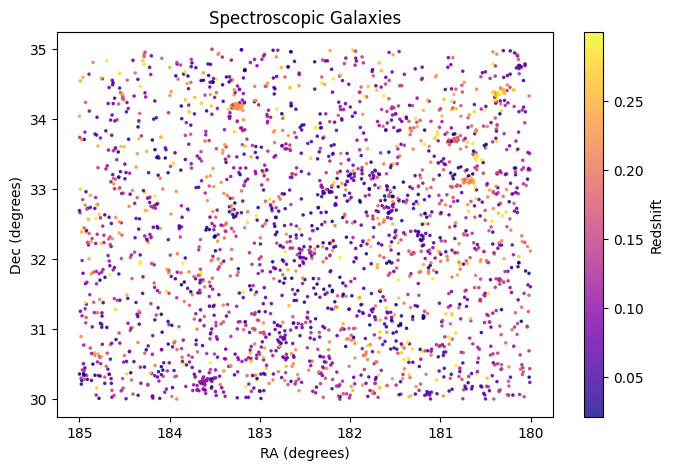

In [7]:
# Simple visualization of test data

plt.figure(figsize=(8, 5))
plt.scatter(spec_data_test['ra'],spec_data_test['dec'],c=spec_data_test['z'], s=2.5, alpha=0.8, cmap='plasma')

plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Spectroscopic Galaxies')
plt.colorbar(label='Redshift')
plt.gca().invert_xaxis()
plt.show()

In [8]:
#Photometric Query
query_photo = f"""
SELECT
    l.ra,
    l.dec,
    l.type,
    l.ls_id,
    l.mag_r,
    l.mag_g,
    l.mag_z,
    l.mag_i,
    l.shape_r,
    l.sersic
FROM ls_dr10.tractor AS l
WHERE
    l.ra BETWEEN {ra_min} AND {ra_max}
    AND l.dec BETWEEN {dec_min} AND {dec_max}
    AND l.type != 'PSF'  -- exclude stars
    AND l.mag_r < 22.0
    AND l.mag_r > 14.0
LIMIT 10000
"""

print("Photometric query ready.")
print(f"Run with: photo_data = qc.query(sql=query_photo, fmt='pandas')")

Photometric query ready.
Run with: photo_data = qc.query(sql=query_photo, fmt='pandas')


In [9]:
# like in the git, test query with limit 100
photo_data = qc.query(sql=query_photo, fmt='pandas')
print(f"Photometric galaxies retrieved: {len(photo_data)}")
print("First 5 entries:")
print(photo_data.head())

Photometric galaxies retrieved: 10000
First 5 entries:
           ra        dec type              ls_id      mag_r      mag_g  \
0  180.020120  30.000292  EXP  10995636693369212  21.827425  22.593670   
1  180.007851  30.003517  DEV  10995636693368995  18.240868  19.341526   
2  180.039613  30.002668  DEV  10995636693369582  18.160702  19.086380   
3  180.033216  30.010361  REX  10995636693369453  21.867355  23.330849   
4  180.035501  30.007932  REX  10995636693369499  20.480803  21.929708   

       mag_z      mag_i   shape_r  sersic  
0  21.481842  21.596865  0.633300     1.0  
1  17.561504  17.865276  1.061211     4.0  
2  17.509697  17.787430  3.598927     4.0  
3  20.574919  21.077847  0.481297     1.0  
4  19.639025  19.997984  0.331723     1.0  


In [10]:
query_crossmatch = f"""
SELECT
    l.ra AS photo_ra,
    l.dec AS photo_dec,
    l.type,
    l.ls_id,
    l.mag_r,
    l.mag_g,
    l.mag_z,
    l.mag_i,
    l.shape_r,
    l.sersic,
    l.g_r,  -- pre-computed color
    l.r_z,  -- pre-computed color
    s.ra AS spec_ra,
    s.dec AS spec_dec,
    s.z AS redshift,
    s.zerr AS redshift_err,
    s.class,
    s.specobjid
FROM ls_dr10.tractor AS l
JOIN ls_dr10.x1p5__tractor__sdss_dr17__specobj AS x ON l.ls_id = x.id1
JOIN sdss_dr17.specobj AS s ON x.id2 = s.specobjid
WHERE
    l.ra BETWEEN {ra_min} AND {ra_max}
    AND l.dec BETWEEN {dec_min} AND {dec_max}
    AND s.z BETWEEN {z_min} AND {z_max}
    AND s.class = 'GALAXY'
    AND s.zwarning = 0
    AND l.type != 'PSF'
LIMIT 5000
"""

In [11]:
# Execute the cross-match query
crossmatched_data = qc.query(sql=query_crossmatch, fmt='pandas')
print(f"number of cross-matched galaxies {len(crossmatched_data)}")
print("\nfirst 5 entries:")
print(crossmatched_data[['photo_ra', 'photo_dec', 'redshift', 'mag_r', 'type']].head())

number of cross-matched galaxies 2646

first 5 entries:
     photo_ra  photo_dec  redshift      mag_r type
0  180.783965  30.441591  0.145922  19.532347  EXP
1  180.423808  30.336083  0.079638  17.216593  SER
2  180.506841  30.061719  0.080946  17.725190  SER
3  180.518636  30.084045  0.071398  16.988304  REX
4  180.869670  30.142503  0.051782  16.596224  SER


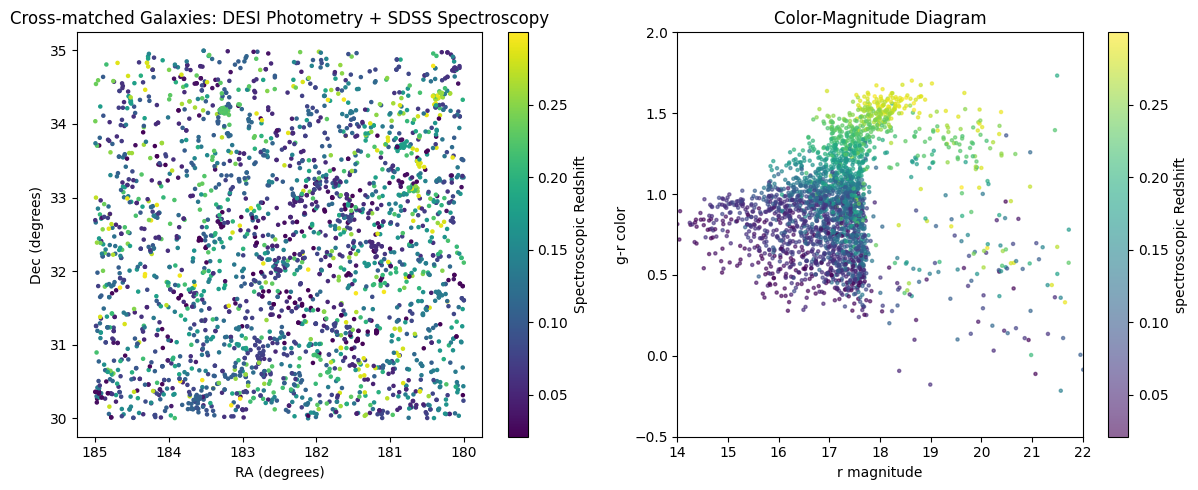

In [12]:
##############################################
#cross-matched data with photometry colors and spectroscopic redshifts
##############################################

plt.figure(figsize=(12, 5))

#the spatial distribution colored by redshift
plt.subplot(1, 2, 1)
plt.scatter(crossmatched_data['photo_ra'], crossmatched_data['photo_dec'],s=5, c=crossmatched_data['redshift'], cmap='viridis')
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Cross-matched Galaxies: DESI Photometry + SDSS Spectroscopy')
plt.colorbar(label='Spectroscopic Redshift')
plt.gca().invert_xaxis()




# Right panel: Color-magnitude diagram
plt.subplot(1, 2, 2)
plt.scatter(crossmatched_data['mag_r'],
           crossmatched_data['g_r'],
           c=crossmatched_data['redshift'],
           s=5,
           alpha=0.6,
           cmap='viridis')
plt.xlabel('r magnitude')
plt.ylabel('g-r color')
plt.title('Color-Magnitude Diagram')
plt.colorbar(label='spectroscopic Redshift')
plt.xlim(14, 22)
plt.ylim(-0.5, 2.0)
plt.tight_layout()
plt.show()

In [ ]:
#this is cool bc we get to see if the properties of the  galaxies change with distance

In [ ]:
#next: 1) we need to select the redshift slices for large-scale structure
#2)3d view of the cosmic web
#3) analyze clustering in redshift slice
#4)add cosmic slime matter density

In [13]:

def zSlicePlot(zMin, zMax, raMin=ra_min, raMax = ra_max, decMin = dec_min, decMax = dec_max, data = crossmatched_data):
    '''A function to plot a z slice with given limits.
    INPUTS:
        zMin (float): the minimum z-value of the slice
        zMax (float): the maximum z-value of the slice
        raMin (float): the minimum ra of the area to display. Default is ra_min
        raMax (float): the maximum ra of the area to display. Default is ra_max
        decMin (float): the minimum dec of the area to display. Default is dec_min
        decMax (float): the maximum dec of the area to display. Default is dec_max
        data (array-like): the table of data to use. Default is the query result in crossmatched_data
    Produces a mathplot scatterplot of the desired region, with galaxies in the z-slice in black, and others in pale red.
    '''
    rz = (data['z'] >zMin) & (data['z']<zMax)
    plt.axis([raMin,raMax,decMin,decMax])
    plt.xlabel("RA (degrees)", fontsize=20)
    plt.ylabel("Dec (degrees)", fontsize=20)
    plt.scatter(data['ra'], data['dec'],s=3,color='r',marker='o',alpha=0.25)
    plt.scatter(data['ra'][rz], data['dec'][rz],s=10,color='b',marker='o')
    plt.show()

In [14]:
# add this line to get rid of error:
!pip install astroquery --break-system-packages

#Jenna's attempts to make astroquery work
from astroquery.sdss import SDSS

import warnings
warnings.filterwarnings('ignore',module='astropy.io.votables.tree')
warnings.filterwarnings('ignore',message='.*unclosed..socket')
query_photo = f'''
SELECT
    pz.z,
    pz.zErr,
    photo.dec,
    photo.ra,
    photo.objID
FROM  PhotoObj AS photo
JOIN Photoz AS pz ON photo.ObjID = pz.ObjID
WHERE
    photo.ra BETWEEN {ra_min} AND {ra_max}
    AND photo.dec BETWEEN {dec_min} AND {dec_max}
    AND pz.z BETWEEN {z_min} AND {z_max}
    AND photo.type = 3
    AND pz.zERR >= 0
    AND photo.clean = 1
    AND pz.PhotoErrorClass = 1
'''
photo_data = SDSS.query_sql(query_photo,timeout=600)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 91.3 MB/s eta 0:00:00


In [15]:
query_spec = f"""
SELECT
    s.ra,
    s.dec,
    s.z,
    s.zerr,
    s.class,
    s.specobjid,
    s.bestobjid
FROM specobj AS s
WHERE
    s.ra BETWEEN {ra_min} AND {ra_max}
    AND s.dec BETWEEN {dec_min} AND {dec_max}
    AND s.z BETWEEN {z_min} AND {z_max}
    AND s.class = 'GALAXY'
    AND s.zwarning = 0
"""
spec_data = SDSS.query_sql(query_spec,timeout=600)


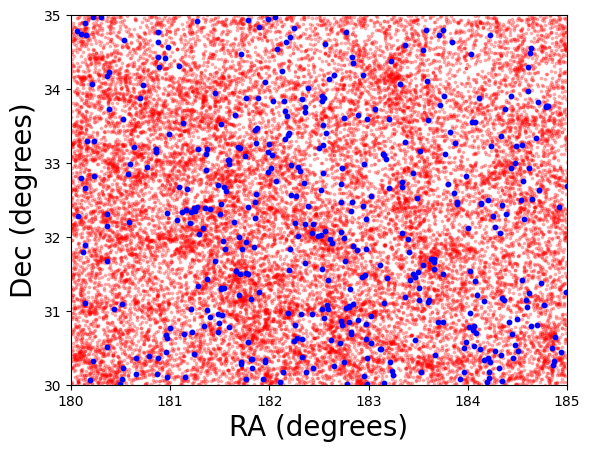

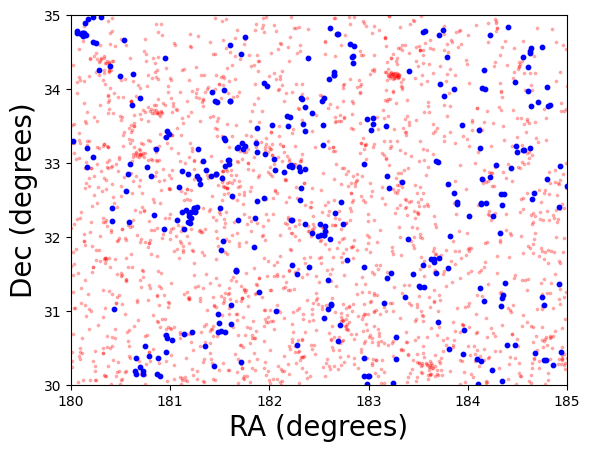

In [16]:
zSlicePlot(0.05,0.07, data=photo_data)
zSlicePlot(0.05,0.07, data=spec_data)

In [17]:
# First, check what columns are actually in your data
print("Photometric data columns:", photo_data.colnames)
print("Spectroscopic data columns:", spec_data.colnames)

for object in spec_data[0:100]:
    photoID = object['bestobjid']
    photoObj = (photo_data['objID'] == photoID)
    print(photoObj)



Photometric data columns: ['z', 'zErr', 'dec', 'ra', 'objID']
Spectroscopic data columns: ['ra', 'dec', 'z', 'zerr', 'class', 'specobjid', 'bestobjid']
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False F

In [18]:
# 3D view of the cosmic web
# Step 1: convert to cartesian coordinates
import numpy as np
from astropy.cosmology import Planck18 as cosmo
import plotly.graph_objects as go

# funciton to convert shperical coordinates to cartesian
def get_cartesian(ra, dec, dist):
  ra_rad = np.radians(ra)
  dec_rad = np.radians(dec)

  X = dist * np.cos(dec_rad) * np.cos(ra_rad)
  Y = dist * np.cos(dec_rad) * np.sin(ra_rad)
  Z = dist * np.sin(dec_rad)
  return X, Y, Z


dist_photo = cosmo.luminosity_distance(photo_data['z'])
dist_spec = cosmo.luminosity_distance(spec_data['z'])
# Convert to Cartesian coordinates
X_p, Y_p, Z_p = get_cartesian(photo_data['ra'], photo_data['dec'], dist_photo)
X_s, Y_s, Z_s = get_cartesian(spec_data['ra'], spec_data['dec'], dist_spec)

print(f"Photmetric sample: {len(X_p)} galaxies converted to 3D coordinates")
print(f"  X range: {X_p.min():.1f} to {X_p.max():.1f} Mpc")
print(f"  Y range: {Y_p.min():.1f} to {Y_p.max():.1f} Mpc")
print(f"  Z range: {Z_p.min():.1f} to {Z_p.max():.1f} Mpc")

print(f"Spectroscopic sample: {len(X_s)} galaxies converted to 3D coordinates")
print(f"  X range: {X_s.min():.1f} to {X_s.max():.1f} Mpc")
print(f"  Y range: {Y_s.min():.1f} to {Y_s.max():.1f} Mpc")
print(f"  Z range: {Z_s.min():.1f} to {Z_s.max():.1f} Mpc")

Photmetric sample: 23977 galaxies converted to 3D coordinates
  X range: -1387.1 Mpc to -81.5 Mpc Mpc
  Y range: -119.2 Mpc to -0.0 Mpc Mpc
  Z range: 49.0 Mpc to 916.7 Mpc Mpc
Spectroscopic sample: 2415 galaxies converted to 3D coordinates
  X range: -1369.5 Mpc to -78.4 Mpc Mpc
  Y range: -110.7 Mpc to -0.0 Mpc Mpc
  Z range: 50.1 Mpc to 905.4 Mpc Mpc


In [19]:
# Step 2: create 3D visualization
# photemetric data first
trace = go.Scatter3d(
    x = X_p,
    y = Y_p,
    z = Z_p,
    mode = 'markers',
    marker = {
        'size'      : 1.5,
        'opacity'   : 0.5,
        'color'     : dist_photo.value,
        'colorscale': 'OrRd'
    }
)

data = [trace]

# set up the view point
camera = dict(
    up = dict(x = 0, y = 0, z = 1),
    center = dict(x = 0.2, y = 0, z = 0),
    eye = dict(x = 0.6, y = -0.6, z = -1.0)
)

# set up the plot scene
layout = go.Layout(
    scene = dict(
        xaxis = dict(title = 'X',
                     backgroundcolor = 'rgb(180,180,180)',
                     gridcolor = "rgb(40,40,40)"),
        yaxis = dict(title = 'Y',
                     backgroundcolor = 'rgb(180,180,180)',
                     gridcolor = "rgb(40,40,40)"),
        zaxis = dict(title = 'Z',
                     backgroundcolor = 'rgb(180,180,180)',
                     gridcolor = "rgb(40,40,40)"),
    ),
        scene_camera = camera,
        plot_bgcolor = 'white',
        paper_bgcolor = 'white',
        title = 'Photometric Sample: 3D Distribution of Galaxies',
        showlegend = False,
        width = 800,
        height = 800,
        autosize = False,
        margin = {'l':0, 'r':0, 'b':0, 't':0},
        dragmode = 'orbit'
)

# Draw the plot
plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout()

In [20]:
# spectrometiric data
trace = go.Scatter3d(
    x = X_s,
    y = Y_s,
    z = Z_s,
    mode = 'markers',
    marker = {
        'size'      : 3.0,
        'opacity'   : 0.5,
        'color'     : dist_spec.value,
        'colorscale': 'OrRd'
    }
)

data = [trace]

# set up the view point
camera = dict(
    up = dict(x = 0, y = 0, z = 1),
    center = dict(x = 0.2, y = 0, z = 0),
    eye = dict(x = 0.6, y = -0.6, z = -1.0)
)

# set up the plot scene
layout = go.Layout(
    scene = dict(
        xaxis = dict(title = 'X',
                     backgroundcolor = 'rgb(180,180,180)',
                     gridcolor = "rgb(40,40,40)"),
        yaxis = dict(title = 'Y',
                     backgroundcolor = 'rgb(180,180,180)',
                     gridcolor = "rgb(40,40,40)"),
        zaxis = dict(title = 'Z',
                     backgroundcolor = 'rgb(180,180,180)',
                     gridcolor = "rgb(40,40,40)"),
    ),
        scene_camera = camera,
        plot_bgcolor = 'white',
        paper_bgcolor = 'white',
        title = 'Spectroscopic Sample: 3D Distribution of Galaxies',
        showlegend = False,
        width = 800,
        height = 800,
        autosize = False,
        margin = {'l':0, 'r':0, 'b':0, 't':0},
        dragmode = 'orbit'
)

# Draw the plot
plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout()


Dec slice: 32.0° to 33.0°
Photometric: 5,059 galaxies
Spectroscopic: 530 galaxies


/tmp/ipython-input-1616639430.py:94: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



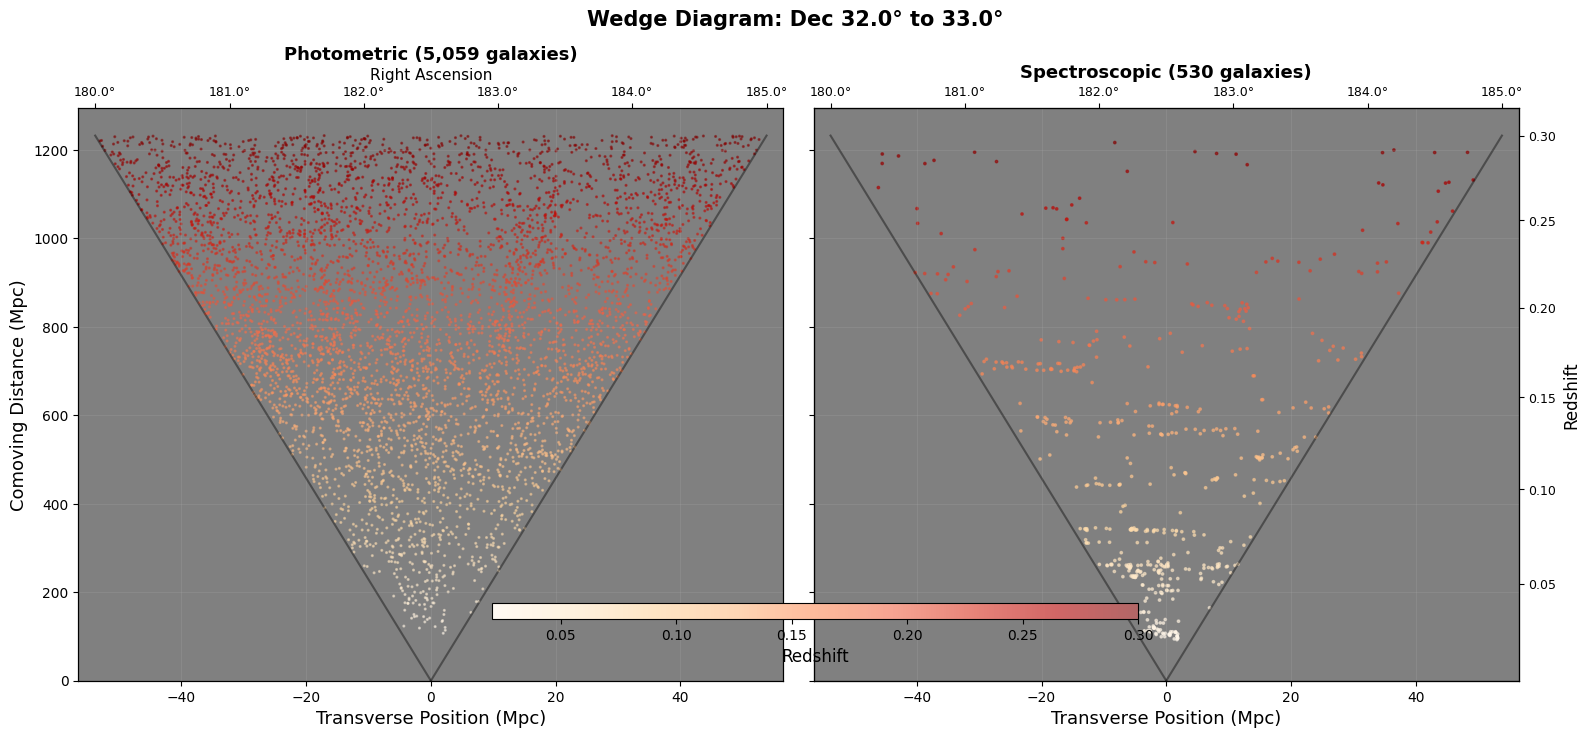

In [21]:
# slice plot distance/redshift vs RA for small slices of dec
def create_comparison_wedge(photo_ra, photo_dec, photo_z,
                           spec_ra, spec_dec, spec_z,
                           dec_slice_center=32.5,
                           dec_width=1.0):

    # Define slice
    dec_min = dec_slice_center - dec_width/2
    dec_max = dec_slice_center + dec_width/2

    # Select galaxies in slice
    photo_mask = (photo_dec >= dec_min) & (photo_dec <= dec_max)
    spec_mask = (spec_dec >= dec_min) & (spec_dec <= dec_max)

    photo_ra_s = photo_ra[photo_mask]
    photo_z_s = photo_z[photo_mask]
    spec_ra_s = spec_ra[spec_mask]
    spec_z_s = spec_z[spec_mask]

    # Convert redshift to distance
    photo_dist = cosmo.comoving_distance(photo_z_s).value
    spec_dist = cosmo.comoving_distance(spec_z_s).value

    print(f"\nDec slice: {dec_min:.1f}° to {dec_max:.1f}°")
    print(f"Photometric: {len(photo_ra_s):,} galaxies")
    print(f"Spectroscopic: {len(spec_ra_s):,} galaxies")

    # Convert to transverse position (for wedge shape)
    ra_center = (ra_min + ra_max) / 2

    photo_x = photo_dist * np.tan(np.radians(photo_ra_s - ra_center))
    spec_x = spec_dist * np.tan(np.radians(spec_ra_s - ra_center))

    # Create side-by-side plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
    ax1.set_facecolor('grey')
    ax2.set_facecolor('grey')

    max_dist = cosmo.comoving_distance(z_max).value
    x_max = max_dist * np.tan(np.radians((ra_max - ra_min) / 2))

    # LEFT: Photometric
    sc1 = ax1.scatter(photo_x, photo_dist, c=photo_z_s, s=1.5,
                     alpha=0.5, cmap='OrRd', vmin=z_min, vmax=z_max)
    ax1.plot([0, x_max], [0, max_dist], 'k-', lw=1.5, alpha=0.4)
    ax1.plot([0, -x_max], [0, max_dist], 'k-', lw=1.5, alpha=0.4)
    ax1.set_xlim(-x_max*1.05, x_max*1.05)
    ax1.set_ylim(0, max_dist*1.05)
    ax1.set_xlabel('Transverse Position (Mpc)', fontsize=13)
    ax1.set_ylabel('Comoving Distance (Mpc)', fontsize=13)
    ax1.set_title(f'Photometric ({len(photo_ra_s):,} galaxies)',
                 fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.2)

    # RIGHT: Spectroscopic
    sc2 = ax2.scatter(spec_x, spec_dist, c=spec_z_s, s=3.0,
                     alpha=0.6, cmap='OrRd', vmin=z_min, vmax=z_max)
    ax2.plot([0, x_max], [0, max_dist], 'k-', lw=1.5, alpha=0.4)
    ax2.plot([0, -x_max], [0, max_dist], 'k-', lw=1.5, alpha=0.4)
    ax2.set_xlim(-x_max*1.05, x_max*1.05)
    ax2.set_xlabel('Transverse Position (Mpc)', fontsize=13)
    ax2.set_title(f'Spectroscopic ({len(spec_ra_s):,} galaxies)',
                 fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.2)

    # Add RA labels on top
    for ax in [ax1, ax2]:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ra_vals = np.linspace(ra_min, ra_max, 6)
        x_vals = max_dist * np.tan(np.radians(ra_vals - ra_center))
        ax_top.set_xticks(x_vals)
        ax_top.set_xticklabels([f'{r:.1f}°' for r in ra_vals], fontsize=9)
        if ax == ax1:
            ax_top.set_xlabel('Right Ascension', fontsize=11)

    # Add redshift scale
    ax_right = ax2.twinx()
    z_vals = np.arange(0.05, z_max+0.01, 0.05)
    d_vals = [cosmo.comoving_distance(z).value for z in z_vals]
    ax_right.set_ylim(0, max_dist*1.05)
    ax_right.set_yticks(d_vals)
    ax_right.set_yticklabels([f'{z:.2f}' for z in z_vals], fontsize=9)
    ax_right.set_ylabel('Redshift', fontsize=12)

    # Colorbar
    cbar = fig.colorbar(sc2, ax=[ax1, ax2], location='bottom',
                       pad=0.08, fraction=0.03, aspect=40)
    cbar.set_label('Redshift', fontsize=12)

    fig.suptitle(f'Wedge Diagram: Dec {dec_min:.1f}° to {dec_max:.1f}°',
                fontsize=15, fontweight='bold')

    plt.tight_layout()
    return fig, (ax1, ax2)

# For SDSS astroquery data:
fig, axes = create_comparison_wedge(
    photo_data['ra'],
    photo_data['dec'],
    photo_data['z'],
    spec_data['ra'],
    spec_data['dec'],
    spec_data['z'],
    dec_slice_center=32.5,  # Center of declination range
    dec_width=1.0           # Width of slice in degrees
)
plt.savefig('wedge_comparison.png', dpi=300, bbox_inches='tight')
plt.show()